# Load dataset

## Load the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('datasets/heart.csv')
df.head()

In [2]:
df.shape

(303, 14)

## Features selection

In [3]:
# split the columns of the dataset in input (X) and output (Y).
features = []
for column in df.columns:
    if column != 'output':
        features.append(column)
X = df[features]
Y = df['output']

In [4]:
# Calculate the Pearson correlation coefficient among features
# All the features have a low correlation, thus we can keep all of them as input features.
df.corr(method ='pearson')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Data Normalization

In [5]:
X.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [6]:
# For each input feature, calculate the MinMaxScaler() and store the result in the same X column.
# The MinMaxScaler() must be fitted firstly through the fit() function and then can be applied for a transformation through
# the transform() function.
# Every feature must be reshaped in the format (-1,1) in order to be passed as input parameter of the scaler.
# For example, Reshape(-1,1) transforms the array [0,1,2,3,5] into [[0],[1],[2],[3],[5]].
from sklearn.preprocessing import MinMaxScaler
import numpy as np
for column in X.columns:
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]

<ipython-input-6-214dd40ad315>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = feature_scaled.reshape(1,-1)[0]
<ipython-input-6-214dd40ad315>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = feature_scaled.reshape(1,-1)[0]
<ipython-input-6-214dd40ad315>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [7]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


## Split the dataset in Training and Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [9]:
y_train.value_counts()

1    133
0    109
Name: output, dtype: int64

In [10]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal_over, y_bal_over = over_sampler.fit_resample(X_train, y_train)

## Balancing The Categories

In [11]:
y_bal_over.value_counts()

0    133
1    133
Name: output, dtype: int64

In [12]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_bal_under, y_bal_under = under_sampler.fit_resample(X_train, y_train)

## Model Selection and Training

In [13]:
# Train the KNeighborsClassifier with imbalanced data.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

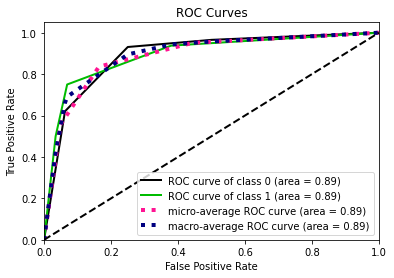

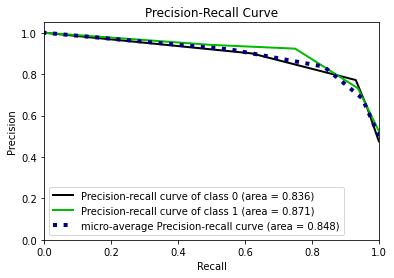

In [14]:
# Calculate the roc_curve() and the precision_recall() then plot them.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc,auc
from scikitplot.metrics import plot_precision_recall
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

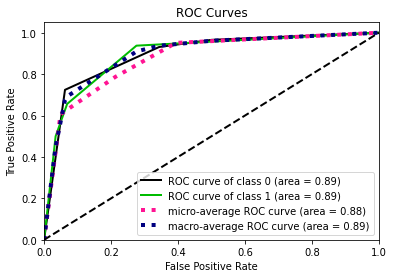

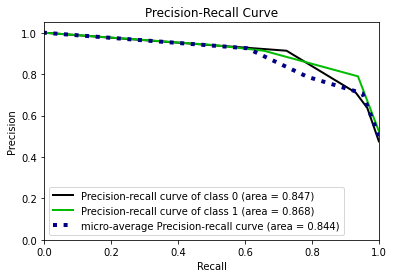

In [15]:
# Train the KNeighborsClassifier with oversampled data.
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_bal_over, y_bal_over)
y_score = model.predict_proba(X_test)
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

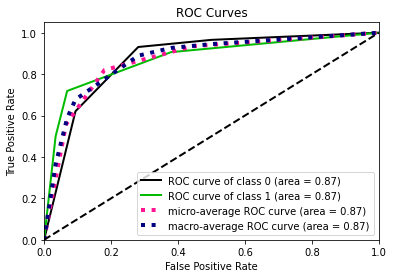

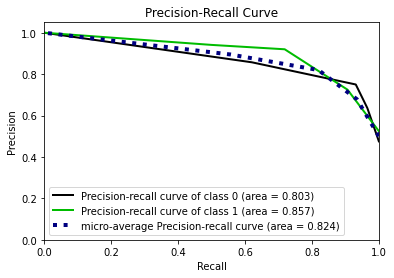

In [16]:
# Train the model with under sampled data.
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_bal_under, y_bal_under)
y_score = model.predict_proba(X_test)
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

## Parameters Tuning

In [17]:
# Select a range of values for each parameter to be tested and put them in the param_grid variable.
# Fit the GridSearchCV() object with the training set and then retrieve the best estimator, contained in the best_estimator_ variable
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid = {
   'n_neighbors': np.arange(2,8),
   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' : ['euclidean','manhattan','chebyshev','minkowski']
}
grid = GridSearchCV(model, param_grid = param_grid)
grid.fit(X_train, y_train)
best_estimator = grid.best_estimator_

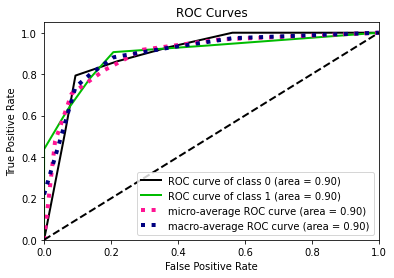

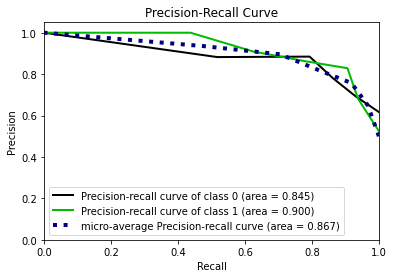

In [18]:
# Select the best estimator as model for the predictions and calculate the performance of the algorithm.
best_estimator.fit(X_train, y_train)
y_score = best_estimator.predict_proba(X_test)
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()